# AI & ML Internship                    Task-4
### By Elevate Labs

# 1. Choose a binary classification dataset.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


data = load_breast_cancer()
X = data.data
y = data.target


# 2.Train/test split and standardize features.


In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 3.Fit a Logistic Regression model.

In [5]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

# 4.Evaluate with confusion matrix, precision, recall, ROC-AUC

Confusion Matrix:
 [[41  2]
 [ 1 70]]
Precision: 0.9722222222222222
Recall: 0.9859154929577465
ROC-AUC: 0.99737962659679


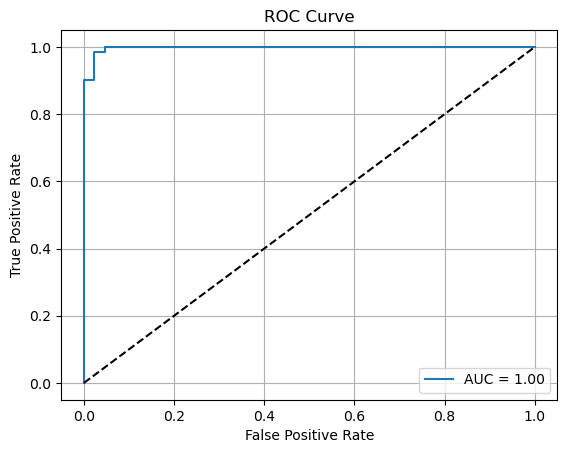

In [11]:

y_prob = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)


roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


# 5.Tune threshold and explain sigmoid function.

In [9]:

custom_threshold = 0.3
y_pred_custom = (y_prob >= custom_threshold).astype(int)


cm_custom = confusion_matrix(y_test, y_pred_custom)
print(f"Confusion Matrix at Threshold {custom_threshold}:\n", cm_custom)
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))


Confusion Matrix at Threshold 0.3:
 [[41  2]
 [ 0 71]]
Precision: 0.9726027397260274
Recall: 1.0
